In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


### EDA

In [13]:
# Read dataset
file_path = "E:/Uni/Thesis/Material/Dataset/archive/world_development_data_imputed.csv"
data = pd.read_csv(file_path, sep=',')

# Explore the data
print(data.head(5))
print(data.isna().sum())

     Year           Country   Region           SubRegion  SurfAreaSqKm  \
0  2000.0       Afghanistan     Asia       Southern Asia      652860.0   
1  2000.0             Malta   Europe     Southern Europe         320.0   
2  2000.0           Belgium   Europe      Western Europe       30530.0   
3  2000.0  Marshall Islands  Oceania          Micronesia         180.0   
4  2000.0        Mauritania   Africa  Sub-Saharan Africa     1030700.0   

     PopTotal      PopDens  PopGrowth%           GDP  GDPGrowth%  ...  \
0  19542982.0    29.963329    1.443803  1.801248e+10   -5.206288  ...   
1    390087.0  1219.021875    0.645267  4.323339e+09   19.681791  ...   
2  10251250.0   338.548547    0.242518  2.367925e+11    3.716679  ...   
3     54224.0   301.244444    0.721838  1.153475e+08    1.354079  ...   
4   2695003.0     2.614731    2.799182  1.779521e+09   -3.918026  ...   

       GNIAtlas  Imports%GDP  IndValAdd%GDP  InflConsPric%  LifeExpBirth  \
0  1.778669e+10    41.312634      17.178

In [14]:
data.columns

Index(['Year', 'Country', 'Region', 'SubRegion', 'SurfAreaSqKm', 'PopTotal',
       'PopDens', 'PopGrowth%', 'GDP', 'GDPGrowth%', 'AdolFertRate',
       'AgriValAdd%GDP', 'Exports%GDP', 'FertRate', 'FDINetBoP',
       'GNI/CapAtlas', 'GNIAtlas', 'Imports%GDP', 'IndValAdd%GDP',
       'InflConsPric%', 'LifeExpBirth', 'MerchTrade%GDP', 'MobileSubs/100',
       'MortRateU5', 'NetMigr', 'UrbanPopGrowth%'],
      dtype='object')

In [15]:
# Preprocess data
europe_data = data[data['Region'] == 'Europe']
europe_data = europe_data.drop(columns=['Year', 'SurfAreaSqKm'])
#europe_data = europe_data.drop(columns=['UrbanPopGrowth%'])
europe_data = europe_data.select_dtypes(include=[np.number])

# Explore data
print(europe_data.head(5))
print(europe_data.isna().sum())


      PopTotal      PopDens  PopGrowth%           GDP  GDPGrowth%  \
1     390087.0  1219.021875    0.645267  4.323339e+09   19.681791   
2   10251250.0   338.548547    0.242518  2.367925e+11    3.716679   
9    9979610.0    49.197478   -0.471131  1.273686e+10    5.800003   
11    604950.0   381.082941   -0.027974  9.842930e+08    3.100000   
17   2924668.0   101.844482   -0.203372  1.288429e+09    2.107716   

    AdolFertRate  AgriValAdd%GDP  Exports%GDP  FertRate     FDINetBoP  ...  \
1         19.869        1.871997   120.247484     1.680  7.431853e+08  ...   
2         11.915        1.176005    72.547395     1.670  8.873871e+10  ...   
9         26.695       12.096827    69.210821     1.317  1.188000e+08  ...   
11        22.647       11.301878    36.814992     2.065  3.834577e+09  ...   
17        43.252       25.409322    49.600114     1.499  1.275400e+08  ...   

        GNIAtlas  Imports%GDP  IndValAdd%GDP  InflConsPric%  LifeExpBirth  \
1   4.273280e+09   128.374581      26.9

PopGrowth%         1.000000
UrbanPopGrowth%    0.883384
GNI/CapAtlas       0.552355
LifeExpBirth       0.511404
Exports%GDP        0.379557
FertRate           0.369132
PopDens            0.280296
Imports%GDP        0.243541
NetMigr            0.243042
MobileSubs/100     0.124059
GDP                0.112264
GNIAtlas           0.109270
FDINetBoP          0.107679
GDPGrowth%        -0.017308
PopTotal          -0.047797
MerchTrade%GDP    -0.133023
MortRateU5        -0.143437
InflConsPric%     -0.145585
IndValAdd%GDP     -0.192257
AgriValAdd%GDP    -0.324126
AdolFertRate      -0.418186
Name: PopGrowth%, dtype: float64


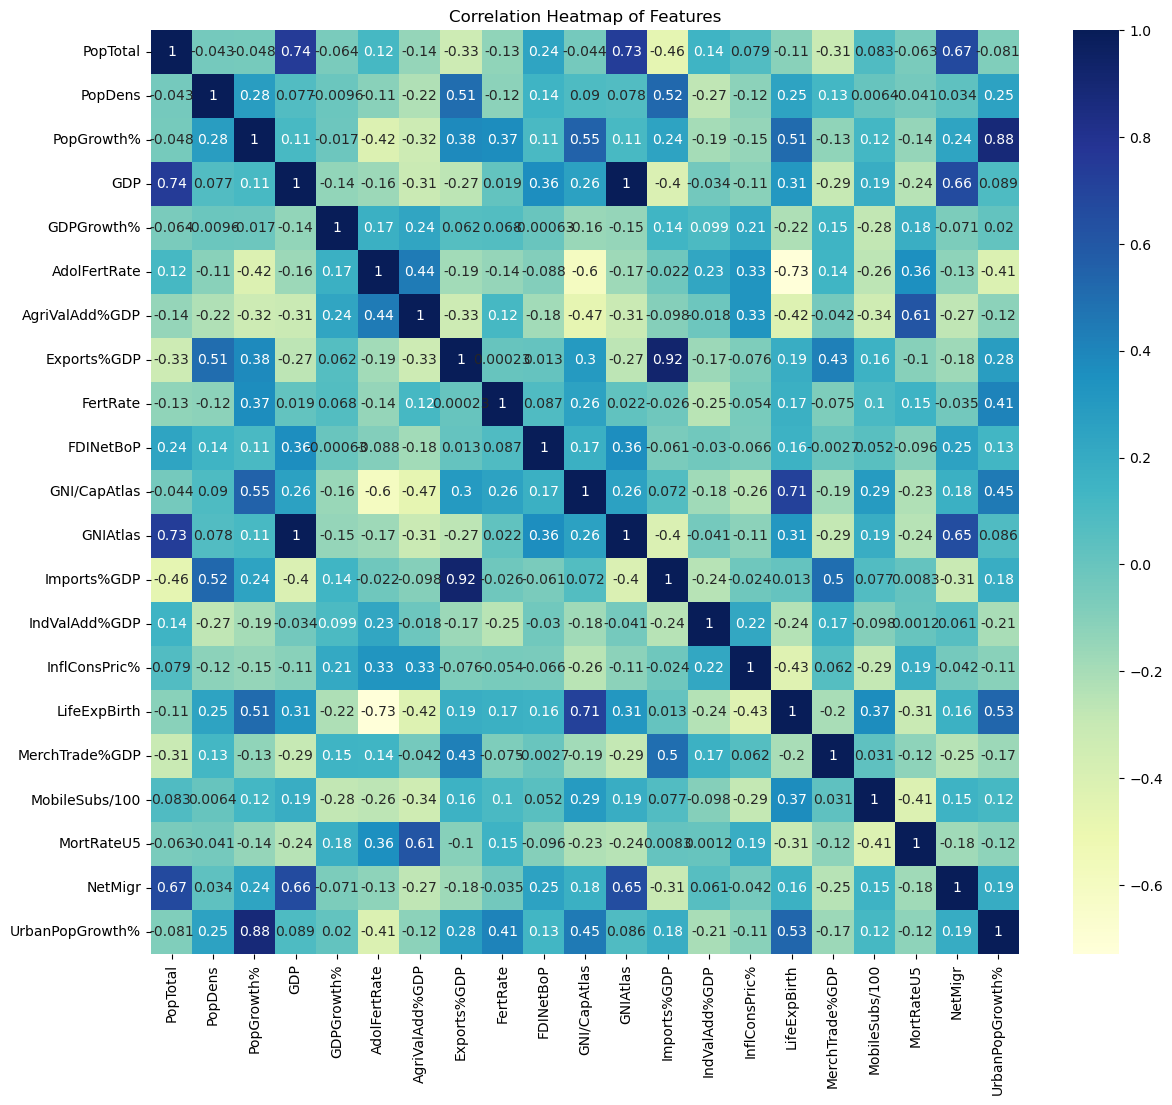

In [16]:
# Compute correlation matrix
europe_data_corr = europe_data.corr()
print(europe_data_corr['PopGrowth%'].sort_values(ascending=False))

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(europe_data_corr, cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap of Features")
plt.savefig("Featurs_Correlation.png", dpi=300, bbox_inches='tight')
plt.show()

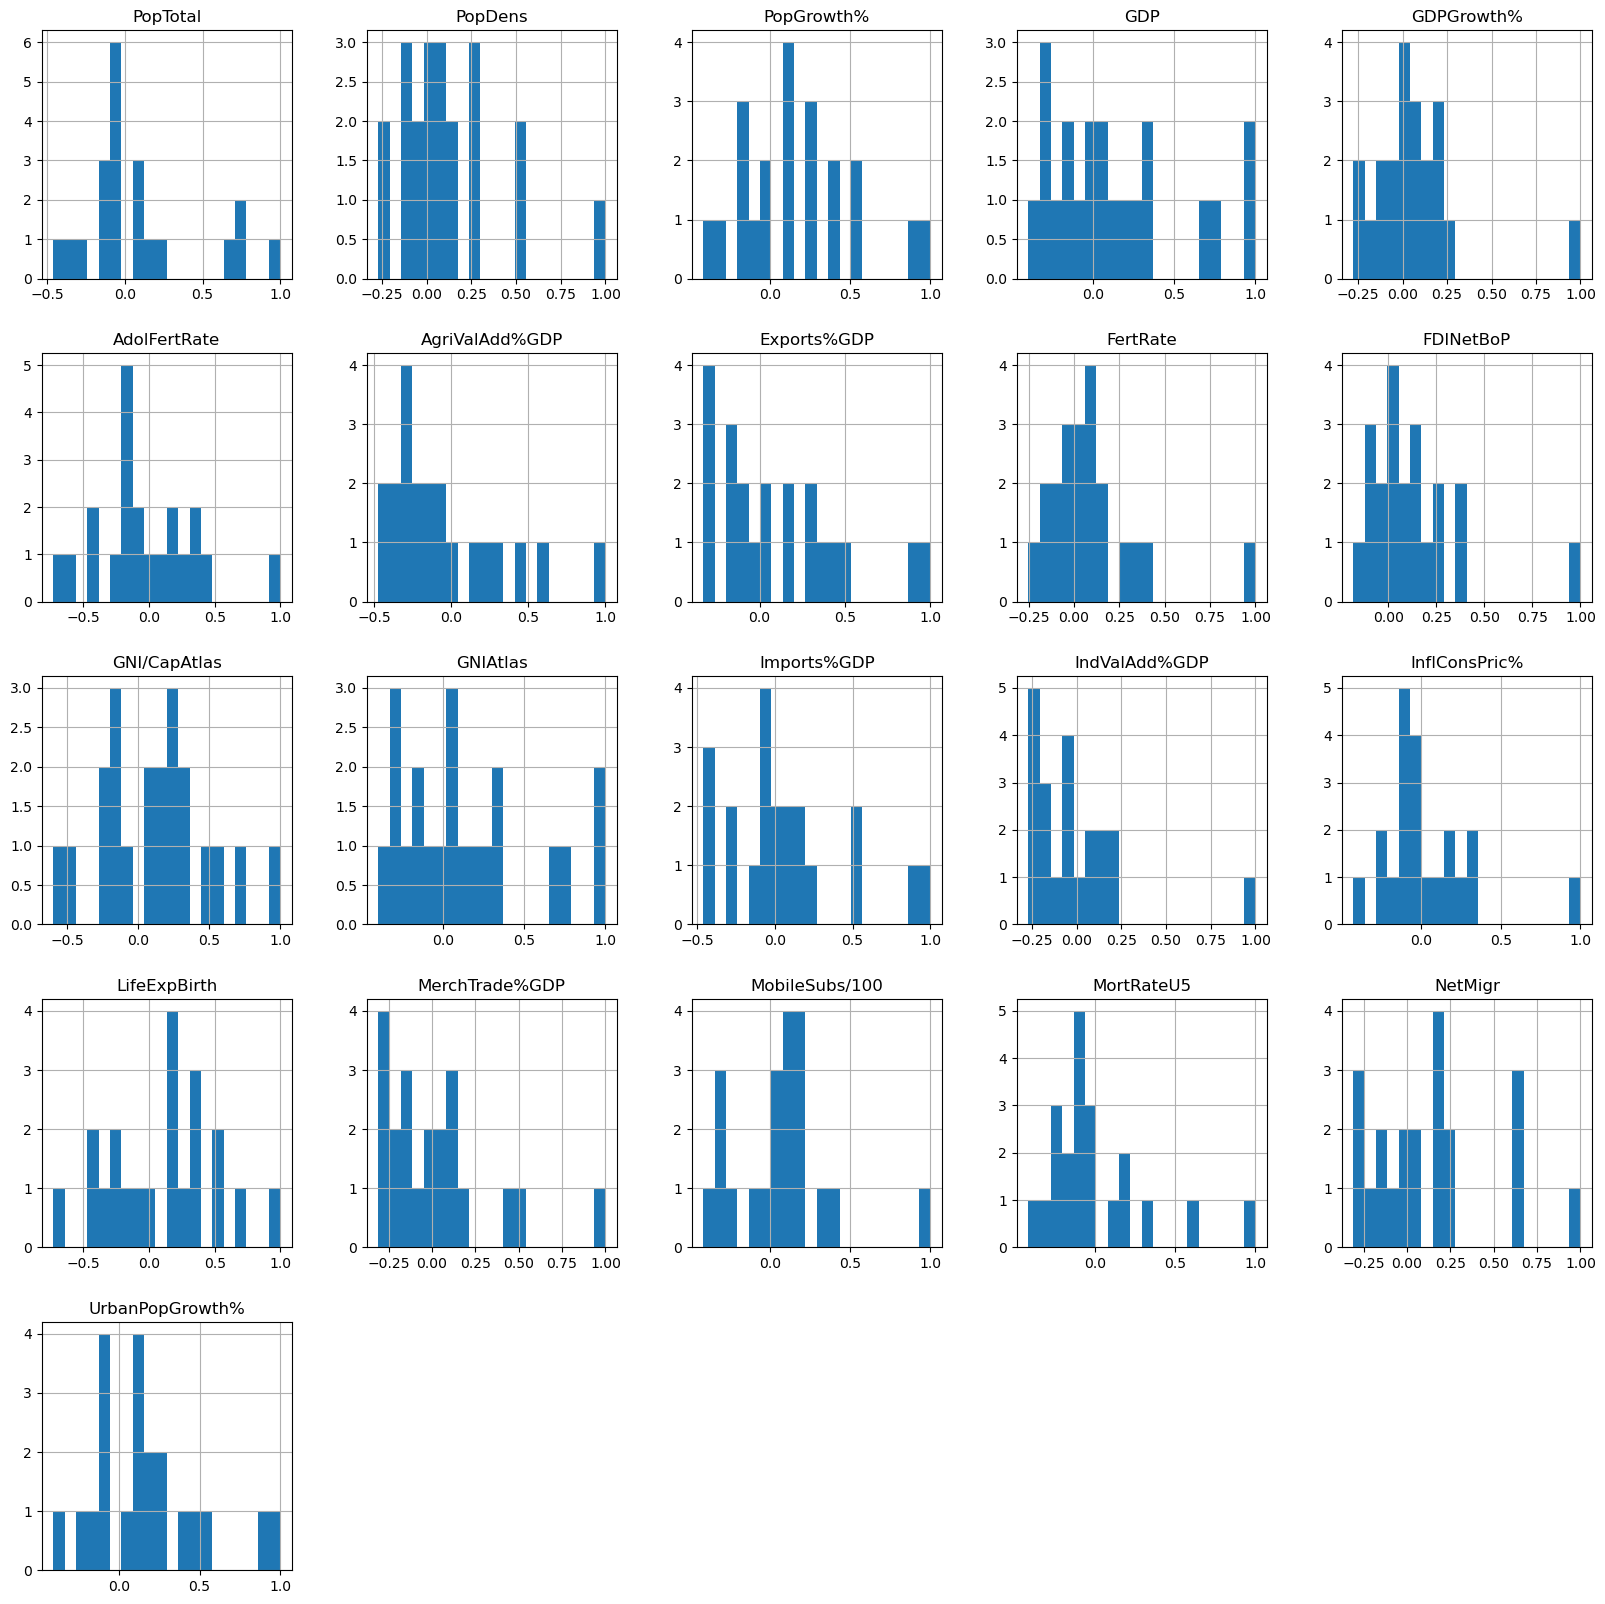

In [17]:
# Plot histograms
europe_data_corr.hist(figsize=(20, 20), bins=20)
plt.title("Features Histograms")
plt.savefig("Features_His.png")
plt.show()

C:\Users\nazno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


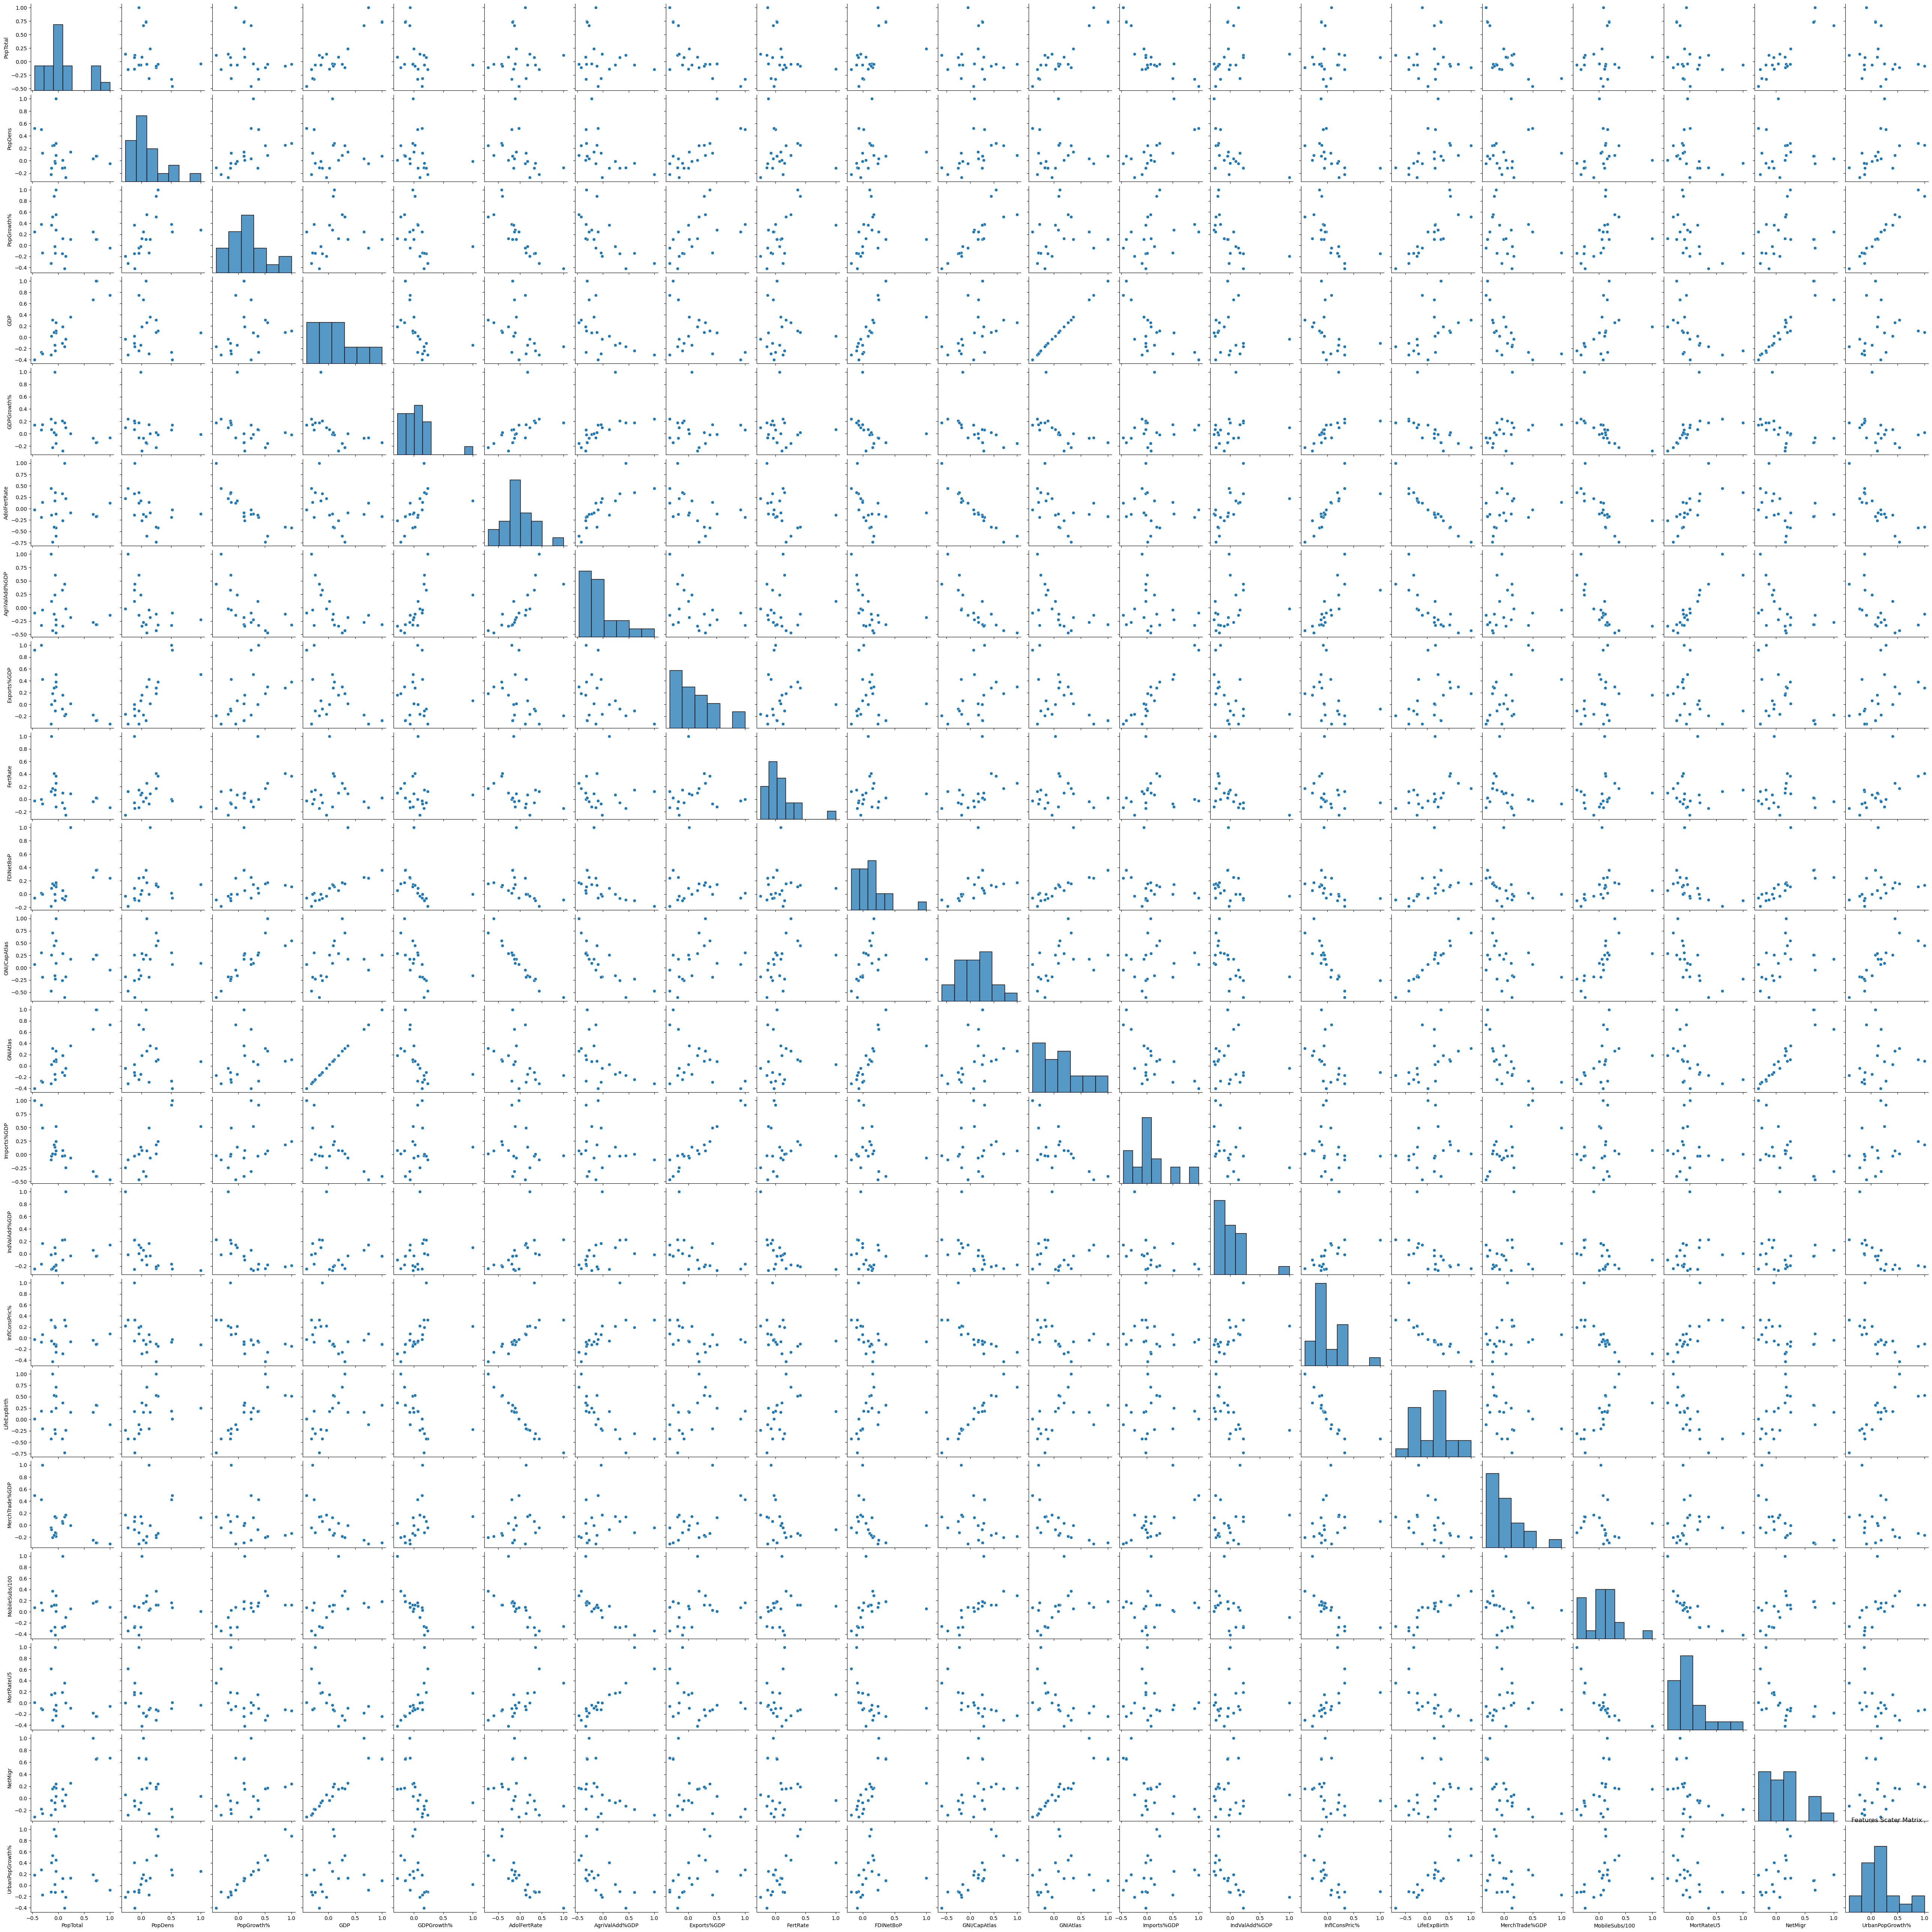

In [18]:
#Plot scatter matrix
sns.pairplot(europe_data_corr)
plt.title("Features Scater Matrix")
plt.savefig("Features_Scat.png", dpi = 300, bbox_inches = 'tight')
plt.show()

#### Prepare data for training and Normalizing the features

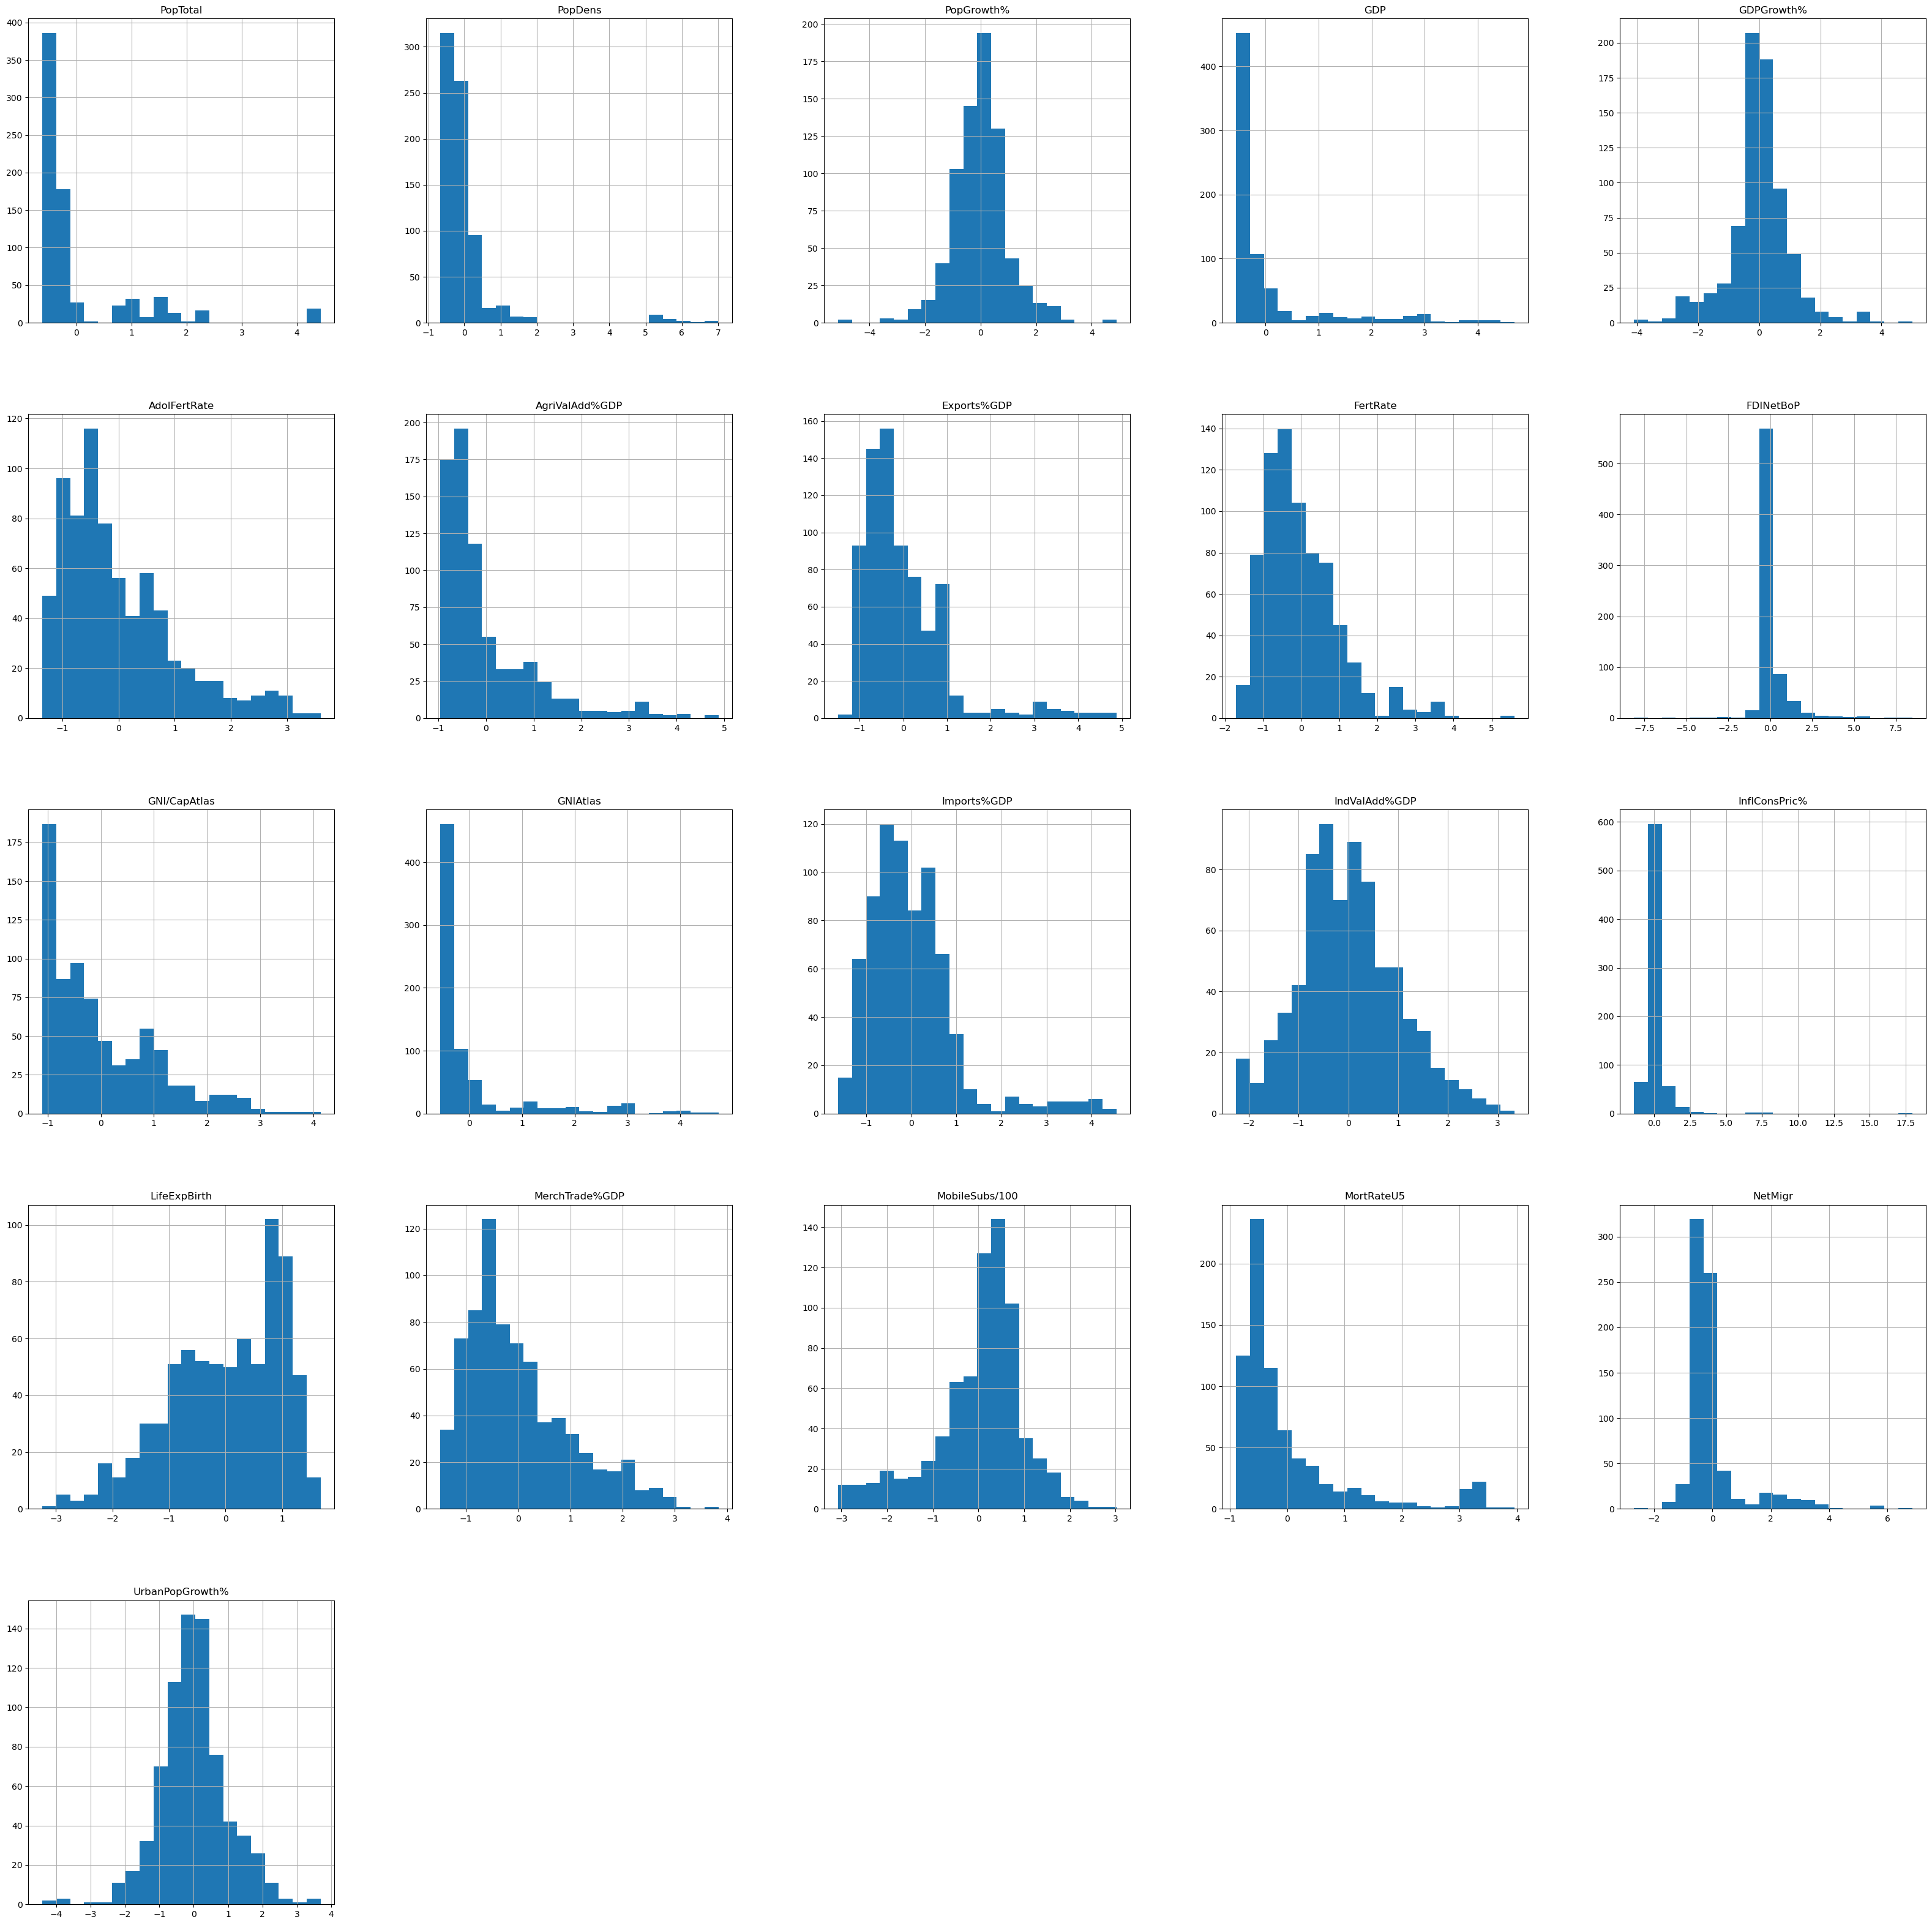

In [19]:
#Split data
train_set, test_set = train_test_split(europe_data, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_set = pd.DataFrame(scaler.fit_transform(train_set), columns=train_set.columns)
test_set = pd.DataFrame(scaler.transform(test_set), columns=test_set.columns)

#Normalize the features
scalered_train_set=scaler.fit_transform(train_set)
scalered_test_set=scaler.transform(test_set)

#Visualize the normalized features
train_set.hist(bins=20,figsize=(40,40))
plt.savefig("Normalized_Features.png")
plt.show()

In [49]:
# Split data into features and target
X_train = train_set.drop(columns=['PopGrowth%'])
y_train = train_set['PopGrowth%']
X_test = test_set.drop(columns=['PopGrowth%'])
y_test = test_set['PopGrowth%']

In [50]:
# Define and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(),
    "XGBoost": XGBRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

for name, model in models.items():
    kFold = KFold(n_splits=10, shuffle=True, random_state=42)
    r2_scores = cross_val_score(model, X_train, y_train, cv=kFold, scoring='r2', error_score='raise')
    mse_scores = -cross_val_score(model, X_train, y_train, cv=kFold, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X_train, y_train, cv=kFold, scoring='neg_mean_absolute_error')
    print(f"{name}:")
    print("Cross-validation R^2 scores:", r2_scores)
    print("Mean R^2:", np.mean(r2_scores))
    print("Cross-validation MSE scores:", mse_scores)
    print("Mean MSE:", np.mean(mse_scores))
    print("Cross_validation MAE scores:", mae_scores)
    print("Mean MAE:", np.mean(mae_scores))
    print("\n")

Linear Regression:
Cross-validation R^2 scores: [0.75115353 0.88616354 0.86725512 0.86728834 0.876096   0.88300763
 0.87137968 0.79444669 0.81497253 0.82281503]
Mean R^2: 0.8434578112618606
Cross-validation MSE scores: [0.17919652 0.09107098 0.1451679  0.11380048 0.15465077 0.15540415
 0.15352601 0.21678672 0.13293459 0.15149697]
Mean MSE: 0.1494035093483831
Cross_validation MAE scores: [0.32472659 0.22632938 0.27227344 0.25268358 0.27976497 0.27606125
 0.27038555 0.33449878 0.26883672 0.2458339 ]
Mean MAE: 0.27513941480189064


Support Vector Regression:
Cross-validation R^2 scores: [0.89795904 0.927929   0.9233779  0.89771455 0.88401241 0.82287293
 0.83772423 0.87928553 0.91882006 0.97278183]
Mean R^2: 0.8962477494886274
Cross-validation MSE scores: [0.07348059 0.05765794 0.08379284 0.08770995 0.14476989 0.23528271
 0.19369841 0.12731148 0.05832443 0.02327213]
Mean MSE: 0.10853003688026648
Cross_validation MAE scores: [0.16395996 0.16340702 0.17262989 0.18381643 0.20058458 0.20369393

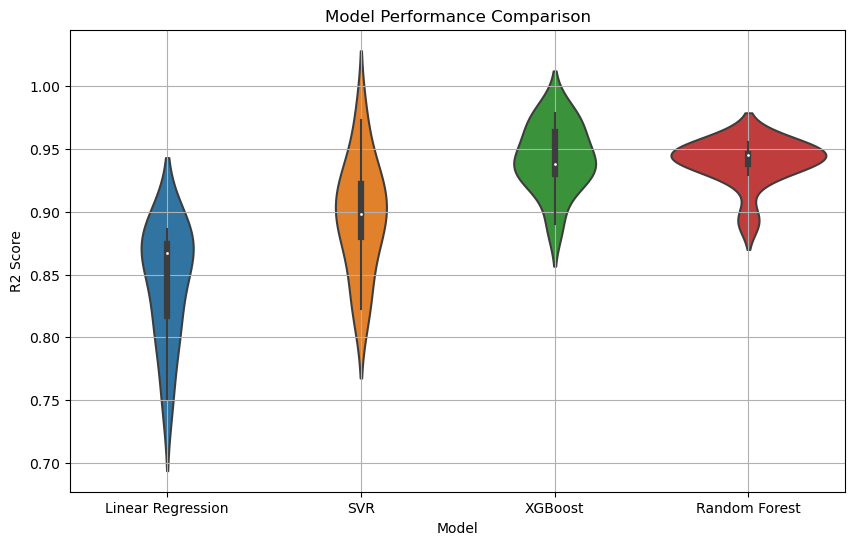

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data: Create a DataFrame with your model's performance data
data = {
    'Model': ['Linear Regression']*10 + ['SVR']*10 + ['XGBoost']*10 + ['Random Forest']*10,
    'R2 Score': [0.751, 0.886, 0.867, 0.867, 0.876, 0.883, 0.871, 0.794, 0.815, 0.823,
                 0.898, 0.928, 0.923, 0.898, 0.884, 0.823, 0.838, 0.879, 0.919, 0.973,
                 0.971, 0.939, 0.952, 0.934, 0.979, 0.938, 0.890, 0.968, 0.924, 0.929,
                 0.941, 0.956, 0.937, 0.946, 0.946, 0.944, 0.893, 0.956, 0.946, 0.929]
}

df = pd.DataFrame(data)

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Model', y='R2 Score', data=df)

plt.title('Model Performance Comparison')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.grid(True)

# Show the plot
plt.savefig("Model_Performance_comparison.png")
plt.show()


In [52]:
#Tese set performance
performance_results = {}
for name, model in models.items():
    # Fit the model to the entire training set
    model.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = model.predict(X_test)
    
    # Calculate and print the R^2 score, MSE and MAE for the test set
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store the performance metrics
    performance_results[name] = {'R2 Score': r2, 'MSE': mse, 'MAE': mae}

# Sort the models based on R^2 score
sorted_models = sorted(performance_results.items(), key=lambda x: x[1]['R2 Score'], reverse=True)

print("Model Rankings based on R^2 Score:")
for idx, (model_name, metrics) in enumerate(sorted_models, start=1):
    print(f"{idx}. {model_name}: R^2 Score = {metrics['R2 Score']:.4f}, MSE = {metrics['MSE']:.4f}, MAE = {metrics['MAE']:.4f}")

Model Rankings based on R^2 Score:
1. XGBoost: R^2 Score = 0.9634, MSE = 0.0488, MAE = 0.1305
2. Random Forest Regressor: R^2 Score = 0.9384, MSE = 0.0822, MAE = 0.1627
3. Support Vector Regression: R^2 Score = 0.9027, MSE = 0.1298, MAE = 0.2080
4. Linear Regression: R^2 Score = 0.8884, MSE = 0.1490, MAE = 0.2791


Feature Importances:
            Feature  Importance
19  UrbanPopGrowth%    0.727618
18          NetMigr    0.081286
5    AgriValAdd%GDP    0.035648
1           PopDens    0.035196
9      GNI/CapAtlas    0.028291
14     LifeExpBirth    0.021088
0          PopTotal    0.015559
2               GDP    0.012900
10         GNIAtlas    0.010074
7          FertRate    0.006958
16   MobileSubs/100    0.005309
17       MortRateU5    0.003739
12    IndValAdd%GDP    0.003583
6       Exports%GDP    0.003338
4      AdolFertRate    0.003078
15   MerchTrade%GDP    0.002160
11      Imports%GDP    0.001503
8         FDINetBoP    0.001074
3        GDPGrowth%    0.000995
13    InflConsPric%    0.000604


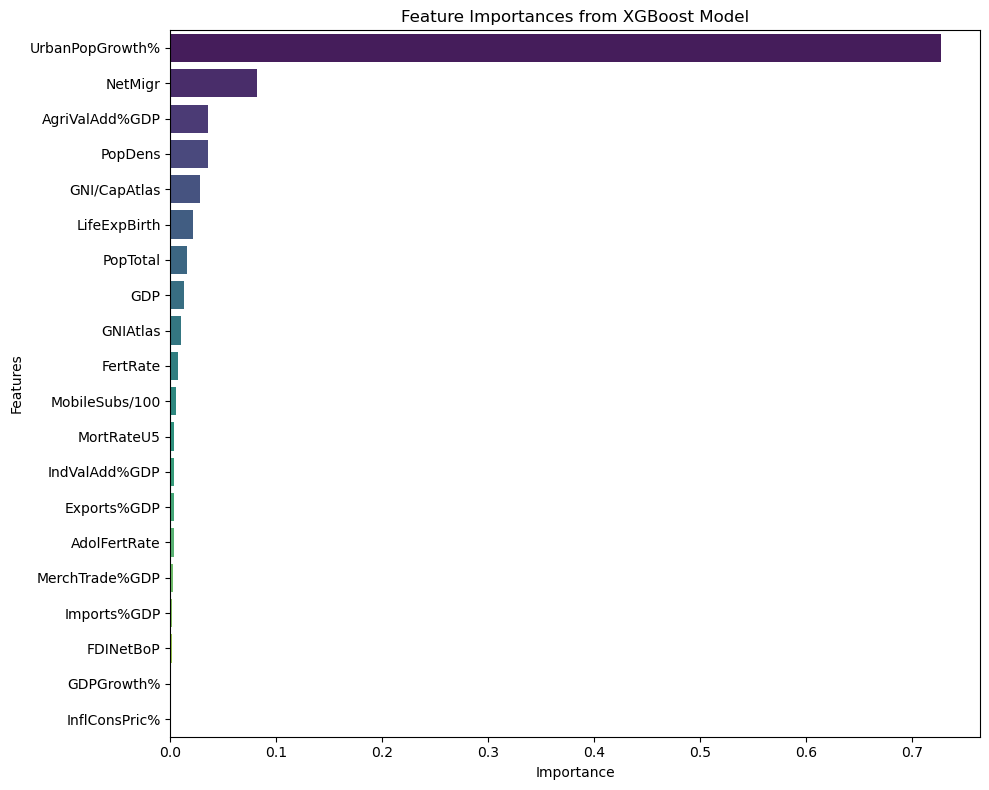

In [53]:
# Fit the model to the entire training set
best_model = models[sorted_models[0][0]]  # Select the best performing model
best_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features based on importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance_df)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title('Feature Importances from XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig("Feature Importances from XGBoost Model.png")
plt.show()

In [54]:
from sklearn.model_selection import GridSearchCV

# Initialize the XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (MSE): ", -grid_search.best_score_)


Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}
Best cross-validation score (MSE):  0.03887456748986166


In [55]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE: ", mse)
print("Test R^2 Score: ", r2)


Test MSE:  0.037864718316080126
Test R^2 Score:  0.9716315597007432


In [56]:
# Extract feature importancesi
feature_importances = best_model.feature_importances_

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features based on importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance_df)

Feature Importances:
            Feature  Importance
19  UrbanPopGrowth%    0.566576
18          NetMigr    0.138752
9      GNI/CapAtlas    0.052663
5    AgriValAdd%GDP    0.039297
14     LifeExpBirth    0.030605
1           PopDens    0.028177
0          PopTotal    0.026988
2               GDP    0.023290
17       MortRateU5    0.015906
10         GNIAtlas    0.013520
15   MerchTrade%GDP    0.011798
12    IndValAdd%GDP    0.010546
7          FertRate    0.007528
16   MobileSubs/100    0.006194
4      AdolFertRate    0.006017
6       Exports%GDP    0.005794
11      Imports%GDP    0.005444
3        GDPGrowth%    0.004700
13    InflConsPric%    0.004337
8         FDINetBoP    0.001869


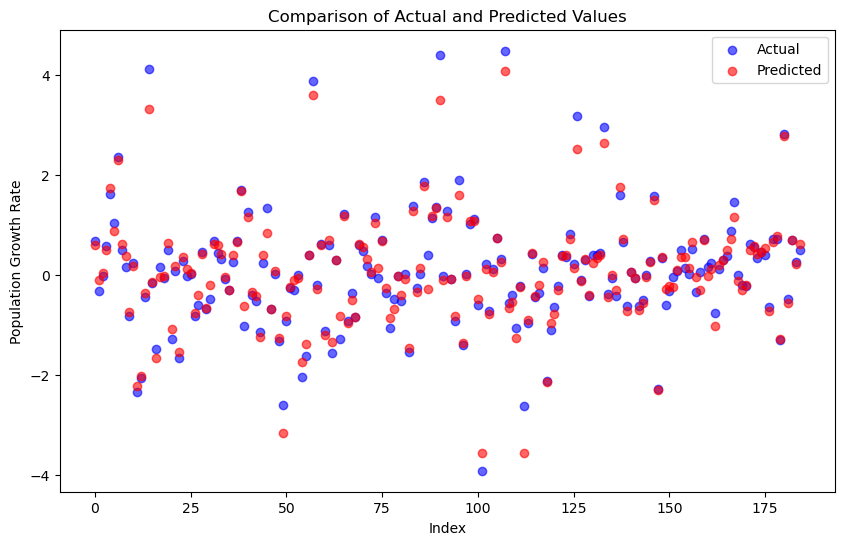

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Predict the test set with the optimized model
y_pred_optimized = best_model.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(np.arange(len(y_pred_optimized)), y_pred_optimized, color='red', label='Predicted', alpha=0.6)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Population Growth Rate')
plt.legend()
plt.savefig("Comparison_of_Actual_and_Predicted_Values.png")
plt.show()



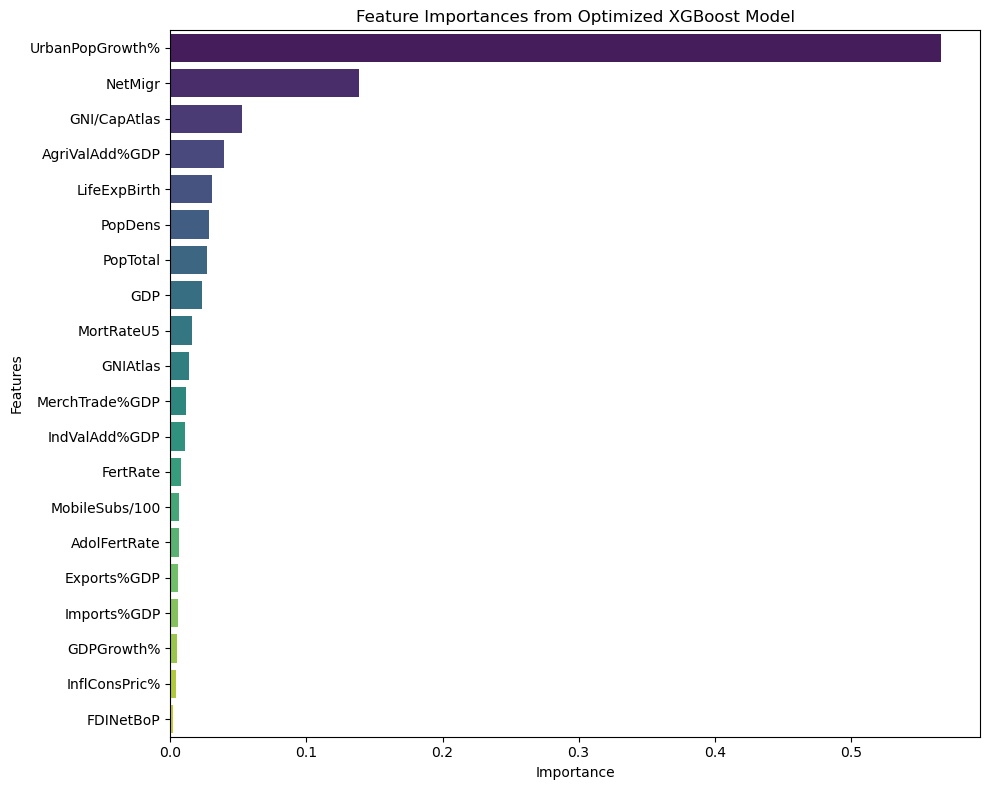

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'importance_df' is already defined and sorted as you described
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title('Feature Importances from Optimized XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig("Optimized_Feature_Importances.png")
plt.show()

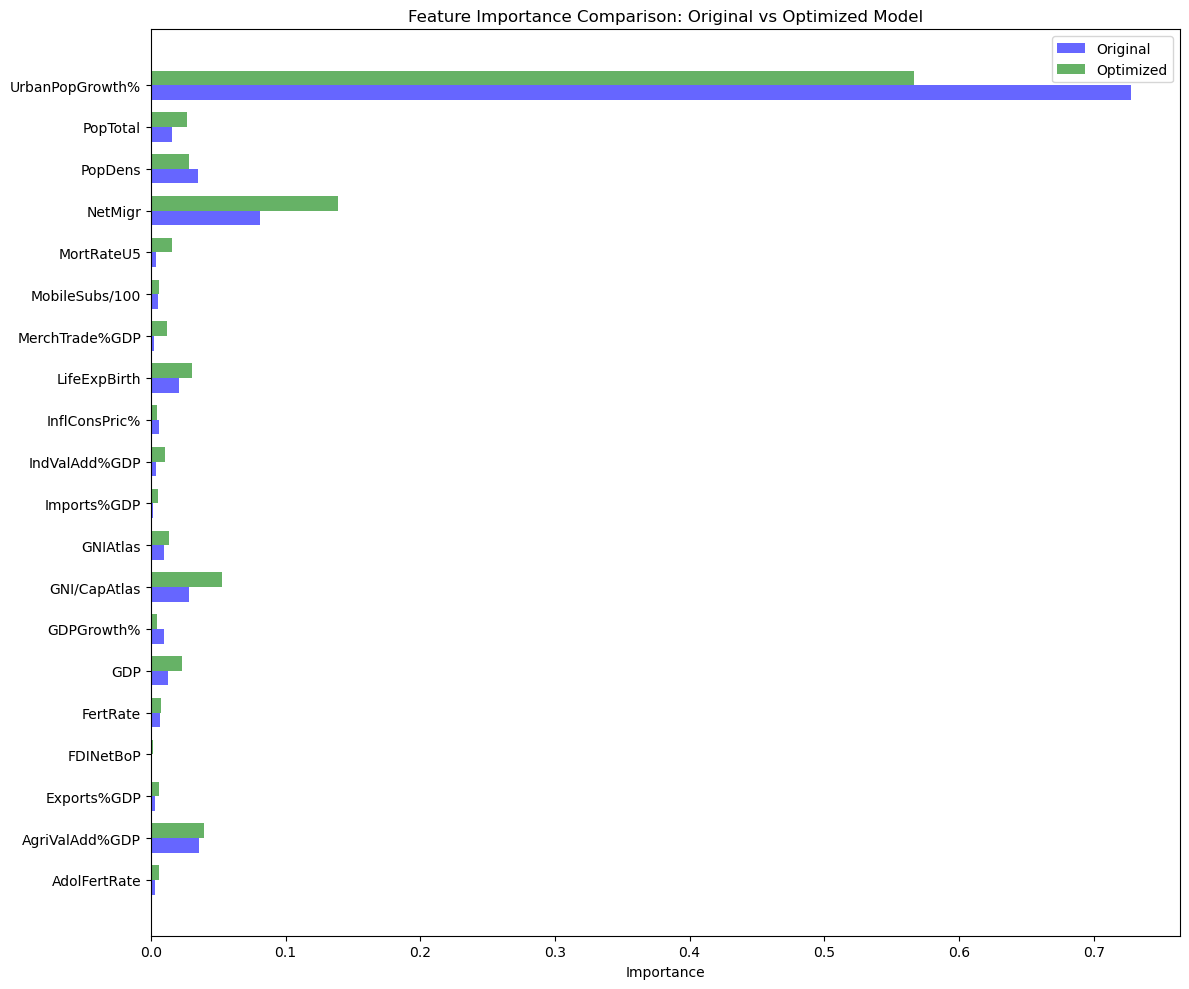

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # Import NumPy for numerical operations

# Updated feature importance data
data = {
    'Features': ['UrbanPopGrowth%', 'NetMigr', 'GNI/CapAtlas', 'AgriValAdd%GDP', 'LifeExpBirth', 
                 'PopDens', 'PopTotal', 'GDP', 'MortRateU5', 'GNIAtlas', 'MerchTrade%GDP', 
                 'IndValAdd%GDP', 'FertRate', 'MobileSubs/100', 'AdolFertRate', 'Exports%GDP', 
                 'Imports%GDP', 'FDINetBoP', 'GDPGrowth%', 'InflConsPric%'],
    'Original Importance': [0.7276, 0.0812, 0.0282, 0.0356, 0.0210, 0.0351, 0.0155, 0.0129, 
                            0.0037, 0.0100, 0.0021, 0.0035, 0.0069, 0.0053, 0.0030, 0.0033, 
                            0.0015, 0.0010, 0.0099, 0.0060],
    'Optimized Importance': [0.5666, 0.1388, 0.0527, 0.0393, 0.0306, 0.0282, 0.0270, 0.0233, 
                             0.0159, 0.0135, 0.0118, 0.0105, 0.0075, 0.0062, 0.0060, 0.0058, 
                             0.0054, 0.0019, 0.0047, 0.0043]
}

# Create DataFrame
df = pd.DataFrame(data)

# Sorting the DataFrame by Features for consistent plotting
df.sort_values('Features', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))
indices = np.arange(len(df['Features']))  # the label locations using NumPy array for correct operations
width = 0.35  # the width of the bars

# Plotting both original and optimized importance
rects1 = ax.barh(indices - width/2, df['Original Importance'], width, label='Original', color='blue', alpha=0.6)
rects2 = ax.barh(indices + width/2, df['Optimized Importance'], width, label='Optimized', color='green', alpha=0.6)

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Importance')
ax.set_title('Feature Importance Comparison: Original vs Optimized Model')
ax.set_yticks(indices)
ax.set_yticklabels(df['Features'])
ax.legend()

fig.tight_layout()
plt.savefig("Feature Importance Comparison.png")
plt.show()


# Ranking on other models to compare the resualts

In [62]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Define the models
xgb_model = XGBRegressor(random_state=42) 
rf_model = RandomForestRegressor(random_state=42)  
linear_model = LinearRegression()
svr_model = SVR()

# Fit XGBoost and Random Forest models and print feature importances
for model_name, model in [('XGBoost', xgb_model), ('Random Forest', rf_model)]:
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print(f"{model_name} Feature Importances:")
    print(importance_df)


XGBoost Feature Importances:
            Feature  Importance
19  UrbanPopGrowth%    0.727618
18          NetMigr    0.081286
5    AgriValAdd%GDP    0.035648
1           PopDens    0.035196
9      GNI/CapAtlas    0.028291
14     LifeExpBirth    0.021088
0          PopTotal    0.015559
2               GDP    0.012900
10         GNIAtlas    0.010074
7          FertRate    0.006958
16   MobileSubs/100    0.005309
17       MortRateU5    0.003739
12    IndValAdd%GDP    0.003583
6       Exports%GDP    0.003338
4      AdolFertRate    0.003078
15   MerchTrade%GDP    0.002160
11      Imports%GDP    0.001503
8         FDINetBoP    0.001074
3        GDPGrowth%    0.000995
13    InflConsPric%    0.000604
Random Forest Feature Importances:
            Feature  Importance
19  UrbanPopGrowth%    0.787733
18          NetMigr    0.043821
5    AgriValAdd%GDP    0.028892
1           PopDens    0.025385
9      GNI/CapAtlas    0.021311
14     LifeExpBirth    0.017140
0          PopTotal    0.012849
16   Mob

In [63]:
# Fit Linear Regression model and print coefficients as importance
linear_model.fit(X_train, y_train)
coefficients = linear_model.coef_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': coefficients})
importance_df = importance_df.sort_values(by='Importance', key=abs, ascending=False)
print("Linear Regression Coefficients:")
print(importance_df)

Linear Regression Coefficients:
            Feature  Importance
19  UrbanPopGrowth%    0.792569
5    AgriValAdd%GDP   -0.253182
9      GNI/CapAtlas    0.201651
11      Imports%GDP    0.155723
2               GDP   -0.155209
18          NetMigr    0.094451
17       MortRateU5    0.090431
10         GNIAtlas    0.087642
6       Exports%GDP   -0.077452
14     LifeExpBirth   -0.070356
7          FertRate    0.052350
16   MobileSubs/100   -0.052225
8         FDINetBoP   -0.042521
0          PopTotal    0.041955
4      AdolFertRate    0.019446
3        GDPGrowth%   -0.017619
13    InflConsPric%   -0.013365
12    IndValAdd%GDP    0.011055
1           PopDens   -0.000714
15   MerchTrade%GDP    0.000455


In [64]:
# Fit SVR model and calculate permutation importance
from sklearn.inspection import permutation_importance
svr_model.fit(X_train, y_train)
perm_importance = permutation_importance(svr_model, X_train, y_train, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': perm_importance.importances_mean})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("SVR Permutation Importances:")
print(importance_df)

SVR Permutation Importances:
            Feature  Importance
19  UrbanPopGrowth%    0.804085
9      GNI/CapAtlas    0.127660
7          FertRate    0.066702
5    AgriValAdd%GDP    0.064493
18          NetMigr    0.064098
12    IndValAdd%GDP    0.058550
17       MortRateU5    0.049465
6       Exports%GDP    0.049203
11      Imports%GDP    0.042509
1           PopDens    0.037501
0          PopTotal    0.036365
14     LifeExpBirth    0.034693
4      AdolFertRate    0.029303
2               GDP    0.027023
10         GNIAtlas    0.026486
16   MobileSubs/100    0.024763
15   MerchTrade%GDP    0.017972
8         FDINetBoP    0.016969
13    InflConsPric%    0.012045
3        GDPGrowth%    0.009300


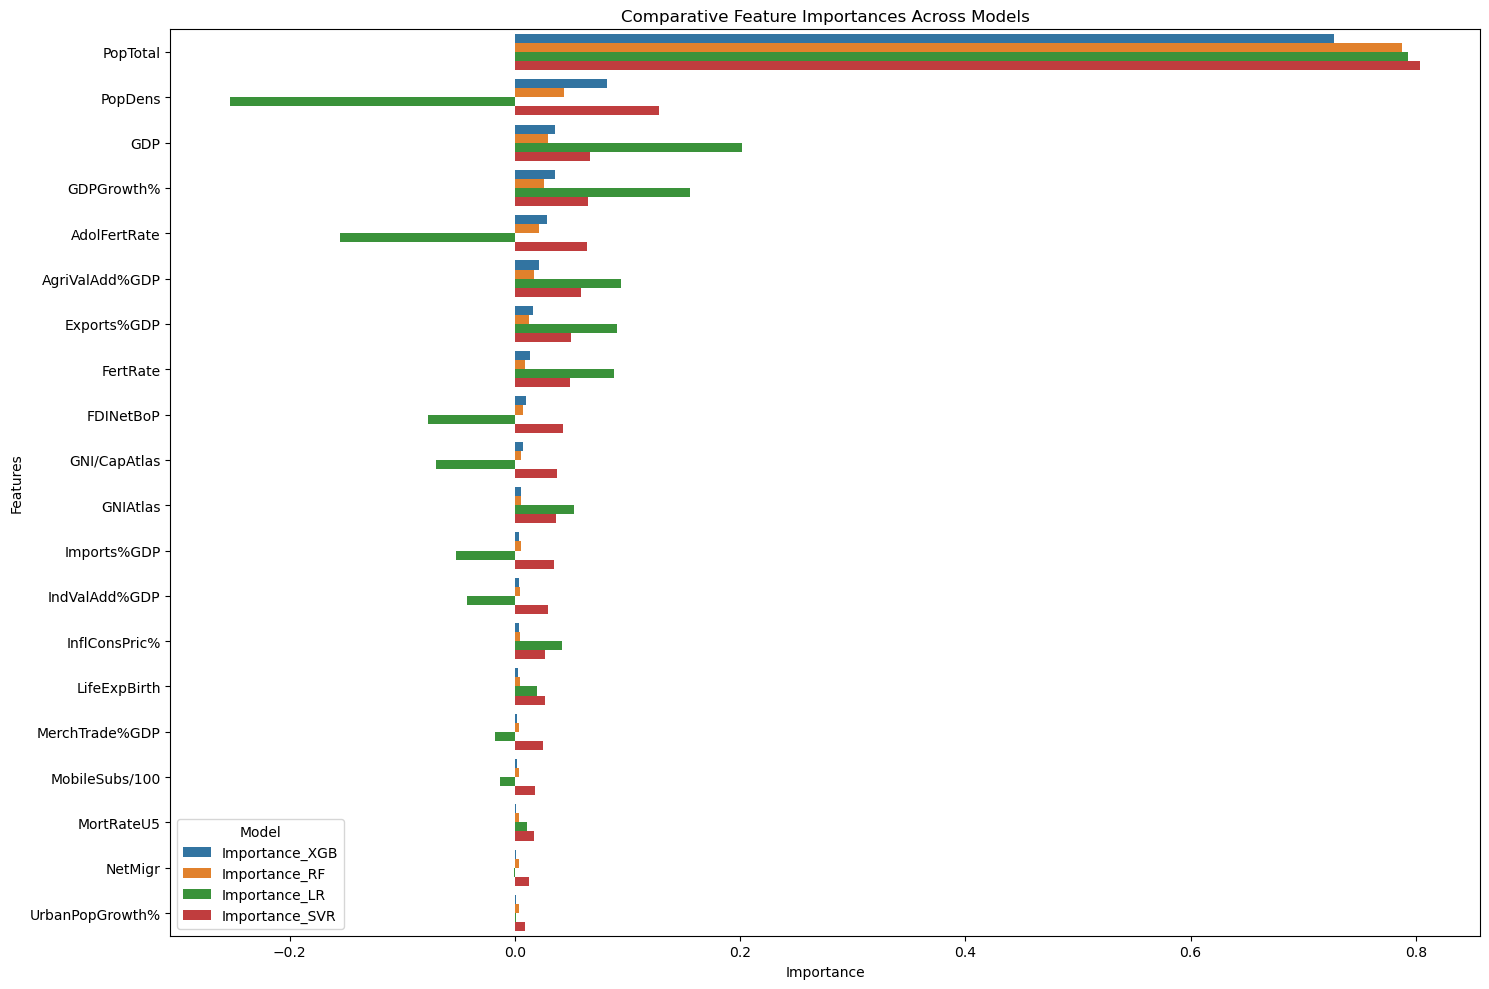

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume x_train.columns are indexed similarly for all feature importance outputs
features = X_train.columns

# Simulating feature importance data as retrieved from each model
xgb_importances = pd.DataFrame({
    'Feature': features,
    'Importance': [0.727618, 0.081286, 0.035648, 0.035196, 0.028291, 0.021088, 0.015559, 0.012900, 0.010074, 0.006958, 0.005309, 0.003739, 0.003583, 0.003338, 0.003078, 0.002160, 0.001503, 0.001074, 0.000995, 0.000604]
})
rf_importances = pd.DataFrame({
    'Feature': features,
    'Importance': [0.787733, 0.043821, 0.028892, 0.025385, 0.021311, 0.017140, 0.012849, 0.009006, 0.007330, 0.005638, 0.005386, 0.005120, 0.004639, 0.004226, 0.004008, 0.003951, 0.003577, 0.003483, 0.003352, 0.003151]
})
lr_importances = pd.DataFrame({
    'Feature': features,
    'Importance': [0.792569, -0.253182, 0.201651, 0.155723, -0.155209, 0.094451, 0.090431, 0.087642, -0.077452, -0.070356, 0.052350, -0.052225, -0.042521, 0.041955, 0.019446, -0.017619, -0.013365, 0.011055, -0.000714, 0.000455]
})
svr_importances = pd.DataFrame({
    'Feature': features,
    'Importance': [0.804085, 0.127660, 0.066702, 0.064493, 0.064098, 0.058550, 0.049465, 0.049203, 0.042509, 0.037501, 0.036365, 0.034693, 0.029303, 0.027023, 0.026486, 0.024763, 0.017972, 0.016969, 0.012045, 0.009300]
})

# Combine all DataFrames into a single DataFrame for plotting
combined_importances = pd.DataFrame({'Feature': features})
combined_importances = combined_importances.merge(xgb_importances, on='Feature')
combined_importances = combined_importances.merge(rf_importances, on='Feature', suffixes=('_XGB', '_RF'))
combined_importances = combined_importances.merge(lr_importances, on='Feature')
combined_importances = combined_importances.merge(svr_importances, on='Feature', suffixes=('_LR', '_SVR'))

# Melting DataFrame for easier plotting
combined_importances_melted = combined_importances.melt(id_vars='Feature', var_name='Model', value_name='Importance')

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', hue='Model', data=combined_importances_melted)
plt.title('Comparative Feature Importances Across Models')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.legend(title='Model')
plt.tight_layout()

plt.savefig('All_Models_Feature_Importances.png')
plt.show()
